In [10]:
#If you need to install in modules in jupyter notebook 
%pip install scikit-learn
%pip install pandas
%pip install matplotlib 
%pip install seaborn 
%pip install graphviz
%pip install scikit-plot   
%pip install statsmodels   


#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import datetime # Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LinearRegression
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):

    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [11]:
#changes the output for the print statements
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)

In [12]:
#Pull 
df = pd.read_csv('https://raw.githubusercontent.com/Rodrig79/Machine-Learning-Data-Analysis-Project/master/rawData/pokemon.csv') 

In [13]:
from sklearn import preprocessing

#Data Cleaning
df = df[~df.Name.str.contains('Mega')] #removed pokemon with "Mega" in it
df = df.drop(columns = ["Name","Type 1","Type 2","#","Generation"]) #Removed columns with names

#normalization
# X = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(X)
# df=pd.DataFrame(x_scaled, columns=df.columns)


In [14]:
 #Splitting dataset to x and y
# y = df.Attack
# X = df[['Defense','HP','Sp. Atk','Sp. Def','Speed']]
#seperating data
df = df.dropna() 
y = df['Attack']
X = df[['Defense','HP','Speed']] 
X.dropna()
y.dropna()

In [15]:
X

,Defense,HP,Sp. Atk,Sp. Def,Speed
0,49,45,65,65,45
1,63,60,80,80,60
2,83,80,100,100,80
4,43,39,60,50,65
5,58,58,80,65,80
...,...,...,...,...,...
794,121,108,81,95,95
795,150,50,100,150,50
797,60,80,150,130,70
798,60,80,170,130,80


# MultiVariate  Regression with sklearn

In [124]:
 from sklearn.linear_model import LinearRegression
 from sklearn import metrics

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print('Wheat dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))


# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Wheat dataset
linear model intercept: 75.61804921078154
linear model coeff:
[ 9.79637961 10.12057203  8.26066902]
R-squared score (training): 0.370
R-squared score (test): 0.374
RMSE: 23.266


# Linear Regression with Gradient Descent 

In [126]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [127]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
# excel_file = 'Folds5x2_pp.xlsx'
# data = pd.read_excel(excel_file)
# print(data.head(5))

In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [129]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        #print(iteration)
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost 
    return B, cost_history 
def pred(x_test, newB):
    return x_test.dot(newB)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)  

In [134]:
# Initial Coefficients
B = np.zeros(X_train.shape[1])
alpha = 0.005
iter_ = 2000
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_)


In [135]:
y_ = pred(X_test,newB)

In [136]:
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)
#----------------
r2(y_,y_test)

-6.571688375255779

In [137]:
ans_ = pred(X_test[3],newB)
ans_

-23.155180614367016

In [138]:

cost_history

[3290.7368925532273,
 3288.8534498363492,
 3286.993251925182,
 3285.1560104156224,
 3283.341440492039,
 3281.5492608825552,
 3279.7791938148885,
 3278.0309649727424,
 3276.3043034527404,
 3274.5989417218984,
 3272.9146155756252,
 3271.25106409625,
 3269.608029612064,
 3267.985257656877,
 3266.382496930072,
 3264.799499257165,
 3263.236019550852,
 3261.6918157725404,
 3260.166648894368,
 3258.660282861688,
 3257.1724845560225,
 3255.7030237584827,
 3254.2516731136416,
 3252.818208093856,
 3251.402406964039,
 3250.0040507468652,
 3248.622923188415,
 3247.2588107242423,
 3245.911502445873,
 3244.580790067711,
 3243.266467894366,
 3241.9683327883845,
 3240.6861841383816,
 3239.4198238275753,
 3238.1690562027093,
 3236.933688043363,
 3235.7135285316467,
 3234.5083892222715,
 3233.3180840129985,
 3232.1424291154476,
 3230.9812430262773,
 3229.834346498721,
 3228.7015625144804,
 3227.582716255963,
 3226.477635078878,
 3225.386148485158,
 3224.308088096233,
 3223.243287626629,
 3222.1915828578

# Regularized Regression Model
## Ridge

In [28]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linridge = Ridge(alpha=25.0).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 7.009233212820845
ridge regression linear model coeff:
[ 0.41417311  0.40321748  0.19917968 -0.29035188  0.26331594]
R-squared score (training): 0.417
R-squared score (test): 0.443
Number of non-zero features: 5


In [352]:
# Ridge regression with feature normalization

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Wheat dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [32]:
# Ridge regression with regularization parameter: alpha

print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))
  

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 5, r-squared training: 0.42, r-squared test: 0.44

Alpha = 1.00
num abs(coeff) > 1.0: 5, r-squared training: 0.41, r-squared test: 0.44

Alpha = 10.00
num abs(coeff) > 1.0: 5, r-squared training: 0.32, r-squared test: 0.33

Alpha = 20.00
num abs(coeff) > 1.0: 5, r-squared training: 0.26, r-squared test: 0.27

Alpha = 50.00
num abs(coeff) > 1.0: 5, r-squared training: 0.18, r-squared test: 0.18

Alpha = 100.00
num abs(coeff) > 1.0: 5, r-squared training: 0.11, r-squared test: 0.11

Alpha = 1000.00
num abs(coeff) > 1.0: 2, r-squared training: 0.02, r-squared test: 0.01



## Lasso Regression

In [131]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=1, max_iter = 10000).fit(X_train_scaled, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: 66.20384241687611
lasso regression linear model coeff:
[34.28143912]
Non-zero features: 1
R-squared score (training): 0.089
R-squared score (test): 0.084

Features with non-zero weight (sorted by absolute magnitude):
	HP, 34.281


In [133]:

print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 1, r-squared training: 0.17, r-squared test: 0.14

Alpha = 1.00
Features kept: 1, r-squared training: 0.09, r-squared test: 0.08

Alpha = 2.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 3.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 5.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 10.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 20.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 50.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01



## Polynomial regression

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold # import k-fold validation
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
    

POLYNOMIAL DEGREE-2 W/ LINEAR REGRESSION
(poly deg 2) linear model coeff (w):
[ 0.00000000e+00  7.83632395e-01  5.81316973e-01  8.36628758e-02
 -3.03589224e-01  2.17935028e-01 -2.64092610e-03  4.12878549e-03
 -2.05705057e-03 -1.36610177e-03 -5.91249232e-06 -3.96493171e-03
 -2.46874919e-03  2.19326197e-03  4.71140219e-03  5.30018156e-03
 -4.63437500e-03 -2.32196045e-03  2.37022152e-03 -8.05809773e-04
 -6.17839096e-04]
(poly deg 2) linear model intercept (b): -6.663
(poly deg 2) R-squared score (training): 0.514
(poly deg 2) R-squared score (test): 0.477
(poly deg 2) RMSE score (train): 20.939
(poly deg 2) RMSE score (test): 21.262

POLYNOMIAL DEGREE-3 W/ LINEAR REGRESSION
(poly deg 3) linear model coeff (w):
[ 1.09582330e-10  9.63693242e-01 -1.68716025e+00  2.32220783e+00
 -1.47109972e+00 -7.42478680e-02 -9.34907237e-03  1.87006590e-02
 -2.78074030e-02  1.70931737e-02  4.16698973e-03  1.27650489e-02
 -5.55729820e-03  1.19546395e-02  1.94395528e-02 -8.89151315e-03
 -8.15594151e-04 -5.397

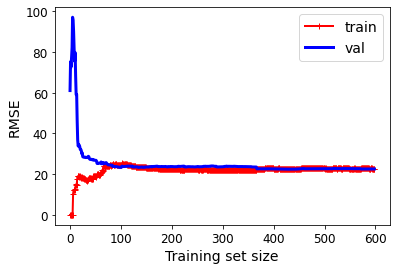

In [40]:
for degree in [2, 3, 5,10]:
    poly = PolynomialFeatures(degree)
    X_F1_poly = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y, random_state=0)
    linreg = LinearRegression().fit(X_train, y_train)

    print('POLYNOMIAL DEGREE-{} W/ LINEAR REGRESSION'.format(degree))
    print('(poly deg {}) linear model coeff (w):\n{}'
         .format(degree, linreg.coef_))
    print('(poly deg {}) linear model intercept (b): {:.3f}'
         .format(degree, linreg.intercept_))
    print('(poly deg {}) R-squared score (training): {:.3f}'
         .format(degree, linreg.score(X_train, y_train)))
    print('(poly deg {}) R-squared score (test): {:.3f}'
         .format(degree, linreg.score(X_test, y_test)))
    print('(poly deg {}) RMSE score (train): {:.3f}'
         .format(degree, sqrt(mean_squared_error(y_train, linreg.predict(X_train)))))
    print('(poly deg {}) RMSE score (test): {:.3f}\n'
         .format(degree, sqrt(mean_squared_error(y_test, linreg.predict(X_test)))))

plot_learning_curves(linreg,  X,y)

In [43]:
for degree in [2, 3, 5, 10]:
    poly = PolynomialFeatures(degree)
    X_F1_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y, random_state=0)
    linreg = Ridge().fit(X_train, y_train)

    print('POLYNOMIAL DEGREE-{} W/ RIDGE REGRESSION'.format(degree))
    print('(poly deg {}) linear model coeff (w):\n{}'
         .format(degree, linreg.coef_))
    print('(poly deg {}) linear model intercept (b): {:.3f}'
         .format(degree, linreg.intercept_))
    print('(poly deg {}) R-squared score (training): {:.3f}'
         .format(degree, linreg.score(X_train, y_train)))
    print('(poly deg {}) R-squared score (test): {:.3f}'
         .format(degree, linreg.score(X_test, y_test)))
    print('(poly deg {}) RMSE score (train): {:.3f}'
         .format(degree, sqrt(mean_squared_error(y_train, linreg.predict(X_train)))))
    print('(poly deg {}) RMSE score (test): {:.3f}\n'
         .format(degree, sqrt(mean_squared_error(y_test, linreg.predict(X_test)))))


POLYNOMIAL DEGREE-2 W/ RIDGE REGRESSION
(poly deg 2) linear model coeff (w):
[ 0.00000000e+00  7.83561256e-01  5.81248959e-01  8.36606865e-02
 -3.03533540e-01  2.17897801e-01 -2.64075722e-03  4.12917773e-03
 -2.05708348e-03 -1.36616736e-03 -5.60359635e-06 -3.96475273e-03
 -2.46871137e-03  2.19313880e-03  4.71163080e-03  5.30016917e-03
 -4.63433789e-03 -2.32194092e-03  2.37009827e-03 -8.06078647e-04
 -6.17730005e-04]
(poly deg 2) linear model intercept (b): -6.659
(poly deg 2) R-squared score (training): 0.514
(poly deg 2) R-squared score (test): 0.477
(poly deg 2) RMSE score (train): 20.939
(poly deg 2) RMSE score (test): 21.262

POLYNOMIAL DEGREE-3 W/ RIDGE REGRESSION
(poly deg 3) linear model coeff (w):
[ 0.00000000e+00  9.62069563e-01 -1.68358847e+00  2.31876270e+00
 -1.46747506e+00 -7.31761141e-02 -9.33646847e-03  1.86938416e-02
 -2.77955470e-02  1.70822169e-02  4.19307280e-03  1.27382279e-02
 -5.53520793e-03  1.19199550e-02  1.94080912e-02 -8.88527363e-03
 -8.00337144e-04 -5.36569

/usr/local/Cellar/jupyterlab/2.2.5/libexec/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.04438e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


POLYNOMIAL DEGREE-10 W/ RIDGE REGRESSION
(poly deg 10) linear model coeff (w):
[ 0.00000000e+00  7.68787830e-30  8.38795854e-30 ...  2.72464543e-16
 -3.14148365e-17 -1.09156796e-17]
(poly deg 10) linear model intercept (b): 55.069
(poly deg 10) R-squared score (training): 0.846
(poly deg 10) R-squared score (test): -11380044339.484
(poly deg 10) RMSE score (train): 11.782
(poly deg 10) RMSE score (test): 3136066.725



/usr/local/Cellar/jupyterlab/2.2.5/libexec/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
